In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [6]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df['class'] = (df["class"] == 'g').astype(int)

In [8]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color= 'blue', label="gamma", alpha = 0.7, density= True)
    plt.hist(df[df["class"] == 0][label], color= 'red', label="hadron", alpha = 0.7, density= True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Train, Validation, Test Dataset


In [10]:
train, valid, test = np.split(df.sample(frac= 1), [int(0.6*len(df)), int(0.8*len(df))] )


In [11]:
df.values

array([[ 28.7967,  16.0021,   2.6449, ...,  40.092 ,  81.8828,   1.    ],
       [ 31.6036,  11.7235,   2.5185, ...,   6.3609, 205.261 ,   1.    ],
       [162.052 , 136.031 ,   4.0612, ...,  76.96  , 256.788 ,   1.    ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  30.2987, 256.5166,   0.    ],
       [120.5135,  76.9018,   3.9939, ...,  84.6874, 408.3166,   0.    ],
       [187.1814,  53.0014,   3.2093, ...,  52.731 , 272.3174,   0.    ]])

In [12]:
def scale_dataset(dataframe,oversample= False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
    
    data = np.hstack((X,np.reshape(y,(-1,1))))
    
    return data , X, y

In [13]:
train ,X_train, y_train = scale_dataset(train, True)
valid ,X_valid, y_valid = scale_dataset(valid,False)
test ,X_test, y_test = scale_dataset(test,False)

#kNN


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [18]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1370
           1       0.84      0.86      0.85      2434

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.80      0.81      0.81      3804



#Naive Bayes

In [20]:
from sklearn.naive_bayes import  GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [26]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51      1370
           1       0.73      0.91      0.81      2434

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



#Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [29]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1370
           1       0.83      0.83      0.83      2434

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM

In [31]:
from sklearn.svm import  SVC #support vector classifier

In [32]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [33]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1370
           1       0.88      0.91      0.89      2434

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [34]:
import tensorflow as tf

2023-07-09 20:42:48.034186: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-09 20:42:48.097233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 20:42:48.395861: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 20:42:48.400626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 20:42:51.424242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [35]:
nm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu",input_shape=(10,)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])



In [43]:
def plot_loss(history):
  
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()
 
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()



In [38]:
nm_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = nm_model.fit(
    X_train,y_train,
    epochs= 100,
    batch_size= 32,
    validation_split=0.2,
    verbose = 0
)

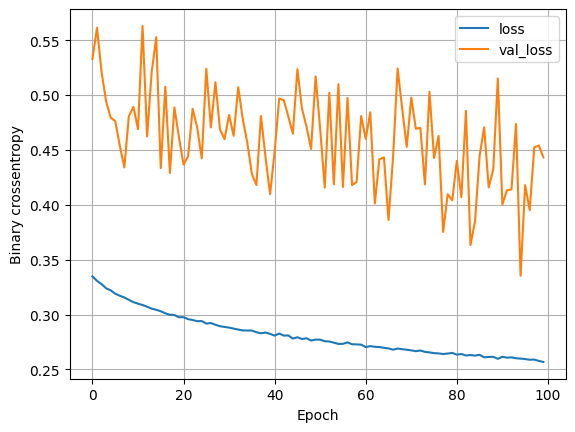

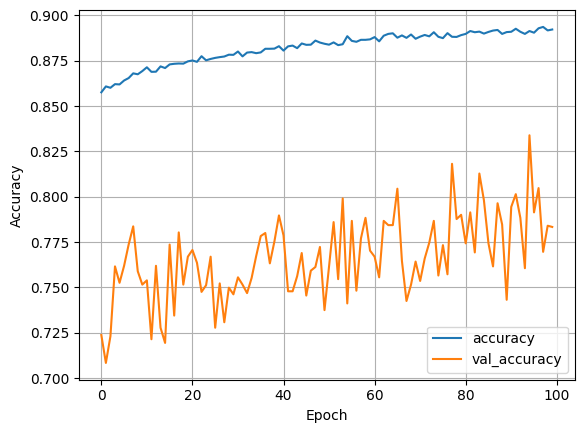

In [44]:
plot_loss(history)
plot_accuracy(history)